In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# About Dataset (Boston Housing)

• CRIM: Per capita crime rate by town

• ZN: Proportion of residential land zoned for lots over 25,000 sq. ft.

• INDUS: Proportion of non-retail business acres per town

• CHAS: Charles River dummy variable (= 1 if tract bounds river and 0
otherwise)

• NOX: Nitric oxide concentration (parts per 10 million)

• RM: Average number of rooms per dwelling

• AGE: Proportion of owner-occupied units built prior to 1940

• DIS: Weighted distances to five Boston employment centers

• RAD: Index of accessibility to radial highways

• TAX: Full-value property tax rate per $10,000

• PTRATIO: Pupil-teacher ratio by town

• B: 1000(Bk – 0.63)2, where Bk is the proportion of [people of African American
descent] by town

• LSTAT: Percentage of lower status of the population

• MEDV: Median value of owner-occupied homes in $1000s

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/"
                   "scikit-learn/scikit-learn/main/sklearn/"
                    "datasets/data/boston_house_prices.csv",
                 skiprows=1)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


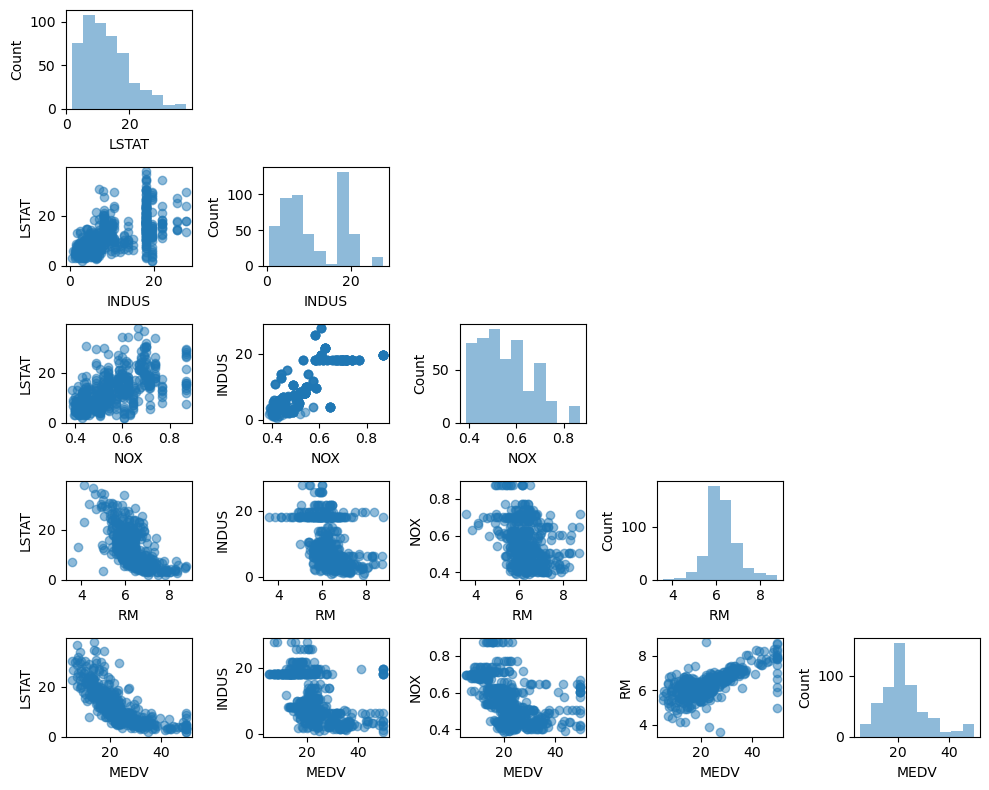

In [11]:
from mlxtend.plotting import scatterplotmatrix

cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
scatterplotmatrix(df[cols].values, figsize=(10, 8),
                  names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

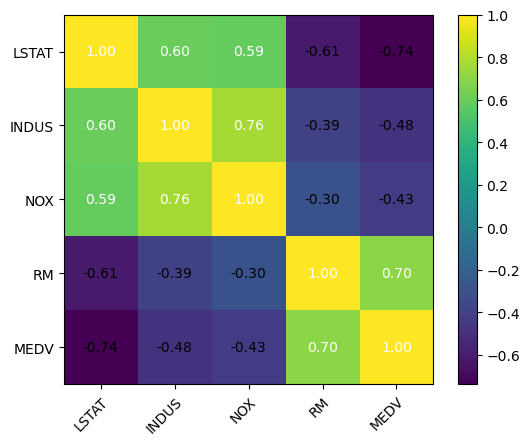

In [15]:
from mlxtend.plotting import heatmap

cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm, row_names=cols, column_names=cols)
plt.show()

NOTES:
- The largest correlation (with target, MEDV) is LSTAT = -0.74. However there is a clear nonlinear relationship between them.
- Correlation between MEDV - RM is 0.70 and it's linear relationship. RM seems to be a good choice for an exploratory variable to introduce the concept of a simple linear regression model.

# Simple Linear Regression Model

In [16]:
# Using OLS method and calculate it with Gradient Descent.
class LinearRegressionGD:
    
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return self.net_input(X)

In [31]:
from sklearn.preprocessing import StandardScaler

X = df[['RM']].values
y = df['MEDV'].values
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

# NOTE:
# y_std using np.newaxis and flatten because most transformers 
#  in scikit-learn expect data to be stored in two-dimensional arrays.

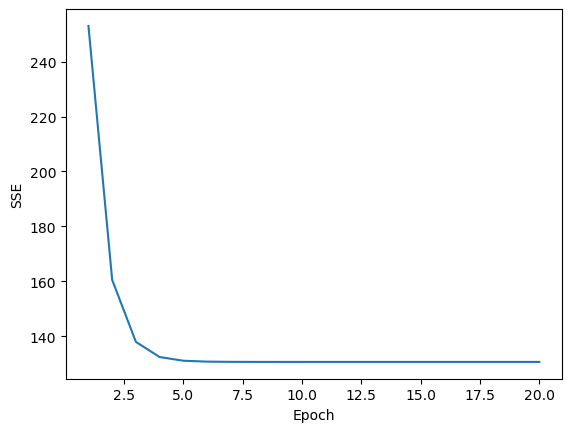

In [33]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel("SSE")
plt.xlabel("Epoch")
plt.show()

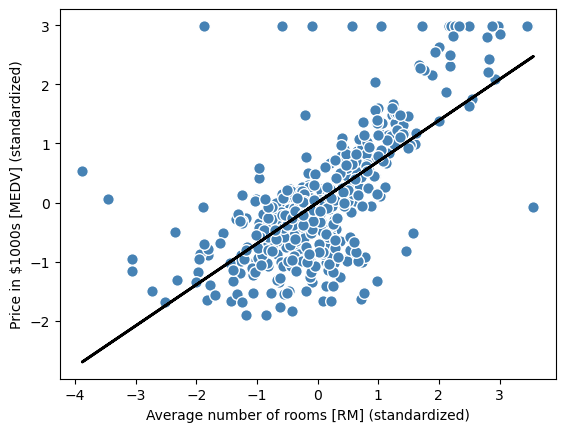

In [34]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None


lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

NOTES:
- Although this observation makes sense, the data also tells us that the number of rooms does not explain house prices very well in many cases.

In [36]:
print('Slope: ', round(lr.w_[1], 3))
print('Intercept: ', round(lr.w_[0], 3))

Slope:  0.695
Intercept:  -0.0


In [38]:
# Using scikit-learn package

from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: ', round(slr.coef_[0], 3))
print('Intercept: ', round(slr.intercept_, 3))

Slope:  9.102
Intercept:  -34.671


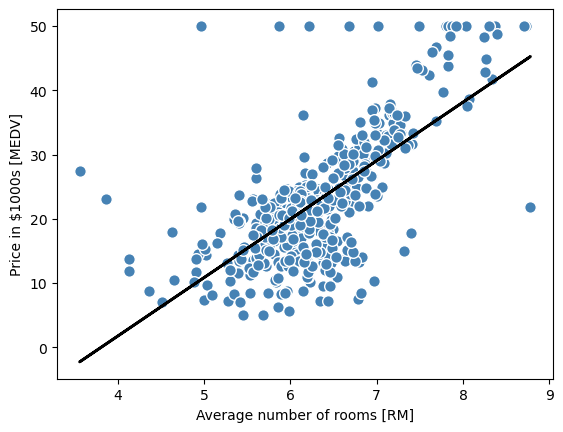

In [39]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

# Fitting a robut regression model using RANSAC

In [41]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(),
                         max_trials=100,
                         min_samples=50,
                         loss='absolute_error',
                         random_state=0)

ransac.fit(X, y)

RANSACRegressor(estimator=LinearRegression(), min_samples=50, random_state=0)

NOTE:
- By default scikit learn use Median Absolute Deviation of y then compare it to the residual_threshold. Points whose residuals are strictly equal to the threshold are considered as inliers.

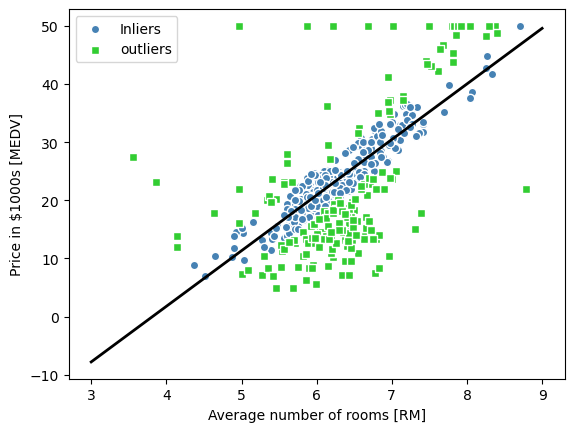

In [43]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white',
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white',
            marker='s', label='outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel("Average number of rooms [RM]")
plt.ylabel("Price in $1000s [MEDV]")
plt.legend(loc='upper left')
plt.show()

In [44]:
print('Slope: ', ransac.estimator_.coef_[0])
print('Intercept: ', ransac.estimator_.intercept_)

Slope:  9.562537078431783
Intercept:  -36.478623602458896


# Evaluating the Performance of Linear Regression Model

In [45]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

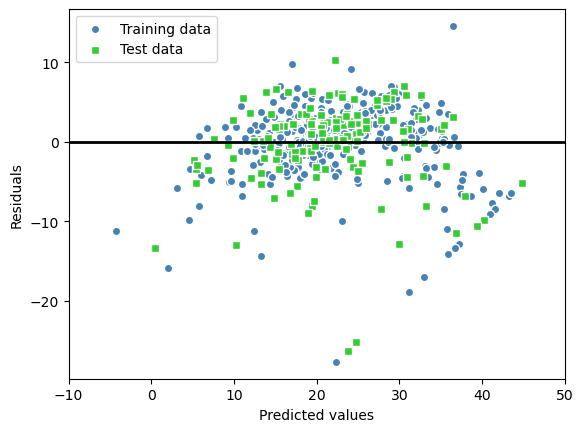

In [46]:
# Residual Plot
plt.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()

In [47]:
# Using Mean Squared Error (MSE)

from sklearn.metrics import mean_squared_error
print(f"MSE train: {mean_squared_error(y_train, y_train_pred)}\n"
      f"MSE test: {mean_squared_error(y_test, y_test_pred)}")

MSE train: 19.958219814238046
MSE test: 27.195965766883276


In [49]:
# Using R-squared or coefficient of determination

from sklearn.metrics import r2_score

print(f"R^2 Train: {r2_score(y_train, y_train_pred)}\n"
      f"R^2 Test: {r2_score(y_test, y_test_pred)}")

R^2 Train: 0.7645451026942549
R^2 Test: 0.6733825506400186


# Using regularized methods for regression

In [51]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

# Using Mean Squared Error (MSE)

from sklearn.metrics import mean_squared_error
print(f"MSE train: {mean_squared_error(y_train, y_train_pred)}\n"
      f"MSE test: {mean_squared_error(y_test, y_test_pred)}")

MSE train: 20.144793664654504
MSE test: 27.762224592166543


In [52]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# Using Mean Squared Error (MSE)

from sklearn.metrics import mean_squared_error
print(f"MSE train: {mean_squared_error(y_train, y_train_pred)}\n"
      f"MSE test: {mean_squared_error(y_test, y_test_pred)}")

MSE train: 24.716522618435864
MSE test: 32.34503899856862


In [53]:
from sklearn.linear_model import ElasticNet

elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)
elanet.fit(X_train, y_train)
y_train_pred = elanet.predict(X_train)
y_test_pred = elanet.predict(X_test)

# Using Mean Squared Error (MSE)

from sklearn.metrics import mean_squared_error
print(f"MSE train: {mean_squared_error(y_train, y_train_pred)}\n"
      f"MSE test: {mean_squared_error(y_test, y_test_pred)}")

MSE train: 24.381276557501547
MSE test: 31.87361081774105


# Adding Polynomial terms using Scikit-learn

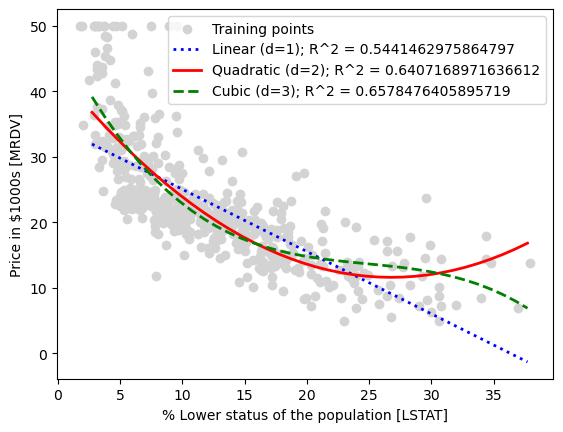

In [58]:
from sklearn.preprocessing import PolynomialFeatures

X = df[['LSTAT']].values
y = df['MEDV'].values

regr = LinearRegression()

quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# X for fitting line
X_fit = np.arange(X.min(), X.max(), 1)[1:, np.newaxis]

# Linear regression
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

# Quadratic regression
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

# Cubic regression
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

# Plot results
plt.scatter(X, y, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label=f'Linear (d=1); R^2 = {linear_r2}',
         color='blue', lw=2, linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label=f'Quadratic (d=2); R^2 = {quadratic_r2}',
         color='red', lw=2, linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label=f'Cubic (d=3); R^2 = {cubic_r2}',
         color='green', lw=2, linestyle='--')

plt.xlabel("% Lower status of the population [LSTAT]")
plt.ylabel("Price in $1000s [MRDV]")
plt.legend(loc='upper right')
plt.show()

# Using Transformation to Features

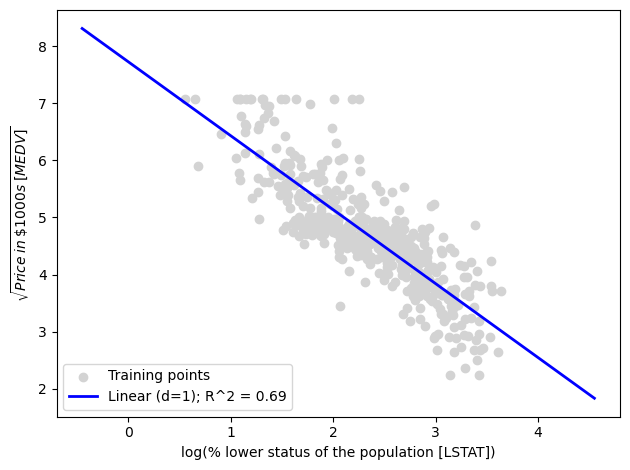

In [61]:
# Transform features
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# Fit features
X_fit = np.arange(X_log.min() - 1,
                  X_log.max() + 1,
                  1)[:, np.newaxis]

regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = round(r2_score(y_sqrt, regr.predict(X_log)), 2)

# Plot results
plt.scatter(X_log, y_sqrt,
            label='Training points',
            color='lightgray')

plt.plot(X_fit, y_lin_fit,
         label=f'Linear (d=1); R^2 = {linear_r2}',
         color='blue',
         lw=2)

plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [MEDV]}$')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

# Decision Tree Regression

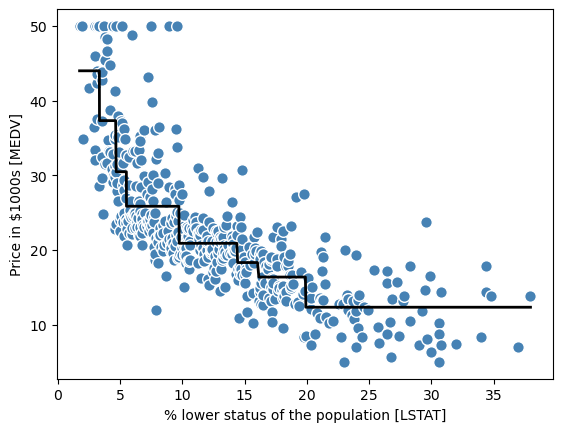

In [62]:
from sklearn.tree import DecisionTreeRegressor

X = df[['LSTAT']].values
y = df['MEDV'].values
tree = DecisionTreeRegressor(max_depth=3) # There will be 8 leaves
tree.fit(X, y)
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.ylabel("Price in $1000s [MEDV]")
plt.xlabel("% lower status of the population [LSTAT]")
plt.show()

# Random Forest Regression

In [66]:
from sklearn.ensemble import RandomForestRegressor

X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test =\
    train_test_split(X, y,
                     test_size=0.4,
                     random_state=1)

forest = RandomForestRegressor(n_estimators=1000,
                               criterion='friedman_mse',
                               random_state=1,
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print(f"MSE train: {round(mean_squared_error(y_train, y_train_pred), 3)}"
      f"MSE test: {round(mean_squared_error(y_test, y_test_pred), 3)}")

print(f"R^2 train: {round(r2_score(y_train, y_train_pred), 3)}"
      f"R^2 test: {round(r2_score(y_test, y_test_pred), 3)}")

MSE train: 1.642MSE test: 11.05
R^2 train: 0.979R^2 test: 0.878


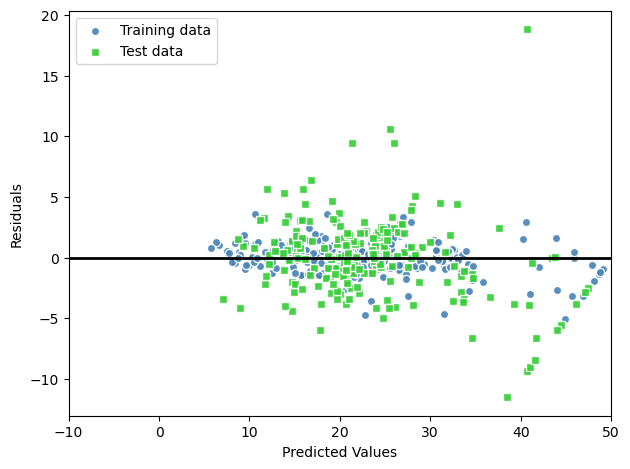

In [68]:
plt.scatter(y_train_pred,
            y_train_pred - y_train,
            c='steelblue',
            edgecolor='white',
            marker='o',
            s=35,
            alpha=0.9,
            label='Training data')

plt.scatter(y_test_pred,
            y_test_pred - y_test,
            c='limegreen',
            edgecolor='white',
            marker='s',
            s=35,
            alpha=0.9,
            label='Test data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

NOTES:
- The distribution of the residuals does not seem to be completely random around the zero center point, indicating that the model is not able to capture all the exploratory information. 
- The residual plot indicates a large improvement over the residual plot of the linear model